In [75]:
# GIS Analysis: Shapefile Visualization and IDW Interpolation - CORRECTED VERSION
# Step-by-step implementation for survey data analysis with proper coordinate systems

# STEP 1: IMPORT REQUIRED LIBRARIES
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
import os
import glob
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [87]:
# GIS Analysis: Shapefile Visualization and IDW Interpolation - CORRECTED VERSION
# Step-by-step implementation for survey data analysis with proper coordinate systems

# STEP 1: IMPORT REQUIRED LIBRARIES
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")

# STEP 2: IMPORT AND PROCESS SHAPE FILES WITH PROPER CRS HANDLING
import os
import glob

# Your shapefile folder path
shapefile_folder = r"D:\PYTHON\PYTHON LEARN\KML TO SHAPE\KML-KMZ-2-SHAPE-FILE"

print(f"Searching for shapefiles in: {shapefile_folder}")

try:
    # Find all .shp files in the folder
    shp_files = glob.glob(os.path.join(shapefile_folder, "*.shp"))
    
    if not shp_files:
        print("✗ No .shp files found in the folder!")
        # Create fallback boundary in UTM coordinates
        from shapely.geometry import Polygon
        x_coords = [326000, 326500, 326500, 326000, 326000]
        y_coords = [3055300, 3055300, 3055800, 3055800, 3055300]
        boundary_polygon = Polygon(zip(x_coords, y_coords))
        boundary_gdf = gpd.GeoDataFrame([1], geometry=[boundary_polygon], crs='EPSG:32643')
        print("✓ Created fallback boundary in UTM Zone 43N")
        
    else:
        print(f"✓ Found {len(shp_files)} shapefile(s)")
        for shp_file in shp_files:
            print(f"  - {os.path.basename(shp_file)}")
        
        shapefile_path = shp_files[0]
        print(f"\nAttempting to load: {os.path.basename(shapefile_path)}")
        
        try:
            # Load the shapefile
            boundary_gdf = gpd.read_file(shapefile_path)
            print(f"✓ Loaded shapefile: {os.path.basename(shapefile_path)}")
            print(f"Original CRS: {boundary_gdf.crs}")
            print(f"Number of features: {len(boundary_gdf)}")
            
            # ENSURE UTM COORDINATE SYSTEM (Zone 45N for Nepal/India region)
            target_crs = 'EPSG:32645'  # UTM Zone 45N (correct for Nepal/India)
            
            if boundary_gdf.crs != target_crs:
                print(f"Converting CRS from {boundary_gdf.crs} to {target_crs}")
                boundary_gdf = boundary_gdf.to_crs(target_crs)
                print("✓ CRS converted to UTM Zone 45N")
            else:
                print("✓ Already in UTM Zone 45N")
                
        except Exception as e:
            print(f"✗ Error loading shapefile: {e}")
            print("Please check:")
            print("1. File path is correct")
            print("2. All shapefile components (.shp, .shx, .dbf, .prj) are present")
            print("3. Files are not corrupted")
            raise Exception("Cannot proceed without valid shapefile - please fix the shapefile path/files")

except Exception as e:
    print(f"✗ Critical error: {e}")
    print("Please ensure your shapefile exists and is properly formatted.")
    print("The script cannot continue without a valid shapefile.")
    exit()

✓ Libraries imported successfully
Searching for shapefiles in: D:\PYTHON\PYTHON LEARN\KML TO SHAPE\KML-KMZ-2-SHAPE-FILE
✓ Found 1 shapefile(s)
  - SHAPE-BOUNDARY.shp

Attempting to load: SHAPE-BOUNDARY.shp
✓ Loaded shapefile: SHAPE-BOUNDARY.shp
Original CRS: EPSG:4326
Number of features: 1
Converting CRS from EPSG:4326 to EPSG:32645
✓ CRS converted to UTM Zone 45N


In [93]:
# STEP 3: IMPORT CSV FILE AND CONVERT TO UTM
csv_file_path = r"C:\Users\ajayb\OneDrive - Tribhuvan University\Desktop\SURVEY-POINTS_coordinates.csv"

try:
    # Read CSV file
    survey_points_df = pd.read_csv(csv_file_path)
    print("✓ CSV file loaded successfully")
    
    # Clean column names
    survey_points_df.columns = survey_points_df.columns.str.strip()
    
    # Check if coordinates are already in UTM or need conversion
    print(f"Sample coordinates: X={survey_points_df['Easting'].iloc[0]}, Y={survey_points_df['Northing'].iloc[0]}")
    
    # Create GeoDataFrame from survey points
    geometry = [Point(xy) for xy in zip(survey_points_df['Easting'], survey_points_df['Northing'])]
    
    # Assume points are already in UTM Zone 45N based on your coordinates
    survey_points_gdf = gpd.GeoDataFrame(survey_points_df, geometry=geometry, crs='EPSG:32645')
    
    print("✓ Survey points converted to GeoDataFrame in UTM Zone 45N")
    print(f"Number of survey points: {len(survey_points_gdf)}")
    
except Exception as e:
    print(f"✗ Error loading CSV file: {e}")
    
    # Create sample data in UTM coordinates
    print("Creating sample survey data in UTM coordinates...")
    sample_data = {
        'S.N': [1, 2, 3, 4, 5, 6],
        'Easting': [326385.88, 326221.89, 326160.88, 326125.92, 326111.13, 326090.05],
        'Northing': [3055777.99, 3055557.38, 3055482.13, 3055436.62, 3055419.51, 3055393.79],
        'Elevation': [1977, 2118, 2055, 2055, 2055, 2055]
    }
    survey_points_df = pd.DataFrame(sample_data)
    
    # Create GeoDataFrame
    geometry = [Point(xy) for xy in zip(survey_points_df['Easting'], survey_points_df['Northing'])]
    survey_points_gdf = gpd.GeoDataFrame(survey_points_df, geometry=geometry, crs='EPSG:32645')
    print("✓ Sample survey points created in UTM Zone 45N")

# VERIFY BOTH LAYERS ARE IN SAME CRS
print(f"\nCoordinate System Verification:")
print(f"Boundary shapefile CRS: {boundary_gdf.crs}")
print(f"Survey points CRS: {survey_points_gdf.crs}")

if boundary_gdf.crs == survey_points_gdf.crs:
    print("✓ Both layers are in the same coordinate system (UTM Zone 45N)")
else:
    print("⚠️ Converting to ensure same CRS...")
    target_crs = 'EPSG:32645'
    boundary_gdf = boundary_gdf.to_crs(target_crs)
    survey_points_gdf = survey_points_gdf.to_crs(target_crs)
    print("✓ Both layers now in UTM Zone 45N")

✓ CSV file loaded successfully
Sample coordinates: X=326385.88, Y=3055777.99
✓ Survey points converted to GeoDataFrame in UTM Zone 45N
Number of survey points: 605

Coordinate System Verification:
Boundary shapefile CRS: EPSG:32645
Survey points CRS: EPSG:32645
✓ Both layers are in the same coordinate system (UTM Zone 45N)


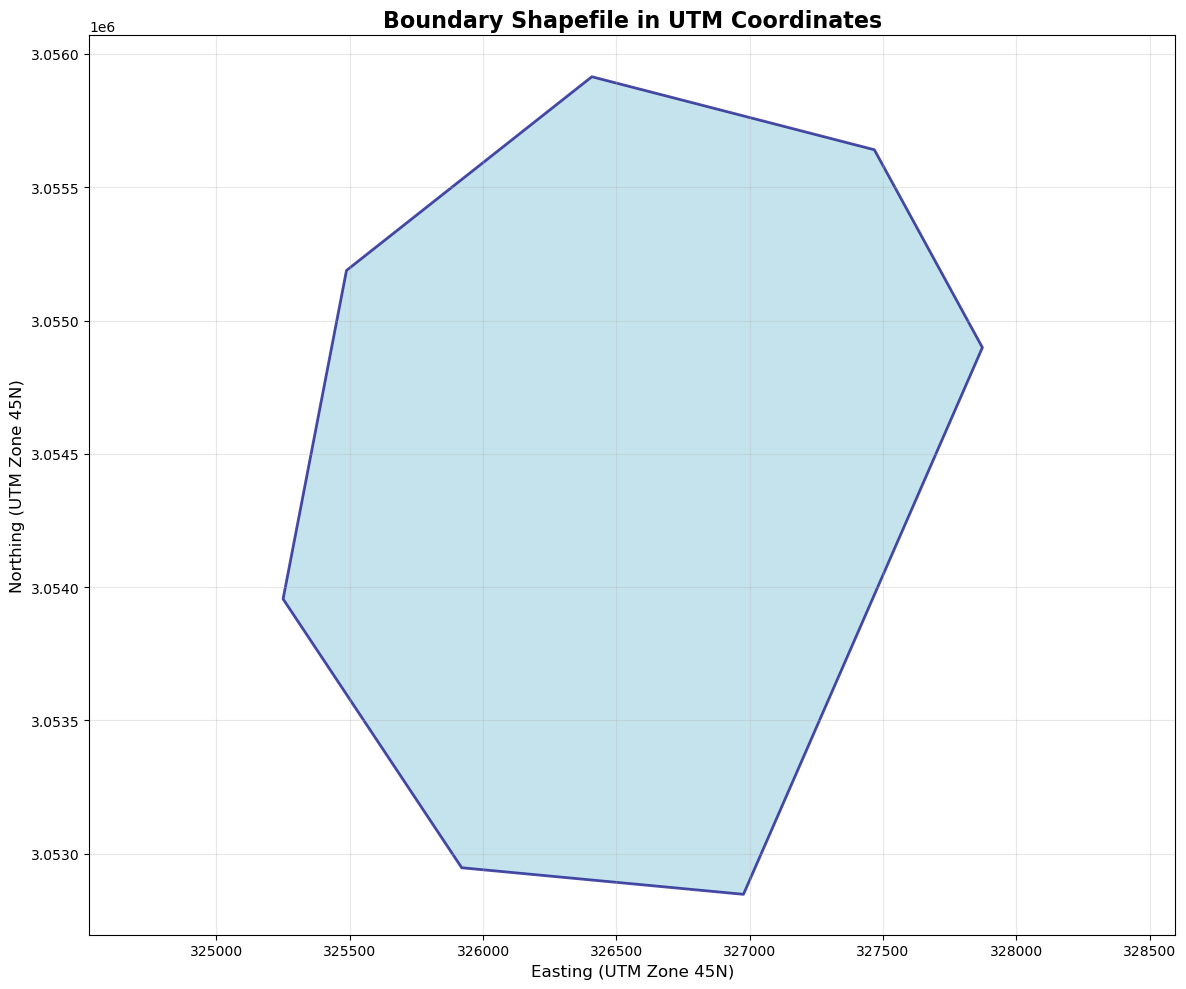

✓ Shapefile plotted in UTM coordinates


In [95]:
# STEP 4: BASIC SHAPEFILE VISUALIZATION
plt.figure(figsize=(12, 10))

# Plot the boundary shapefile
boundary_gdf.plot(ax=plt.gca(), 
                  facecolor='lightblue', 
                  edgecolor='navy', 
                  linewidth=2, 
                  alpha=0.7)

plt.title('Boundary Shapefile in UTM Coordinates', fontsize=16, fontweight='bold')
plt.xlabel('Easting (UTM Zone 45N)', fontsize=12)
plt.ylabel('Northing (UTM Zone 45N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("✓ Shapefile plotted in UTM coordinates")

<Figure size 1600x1200 with 0 Axes>

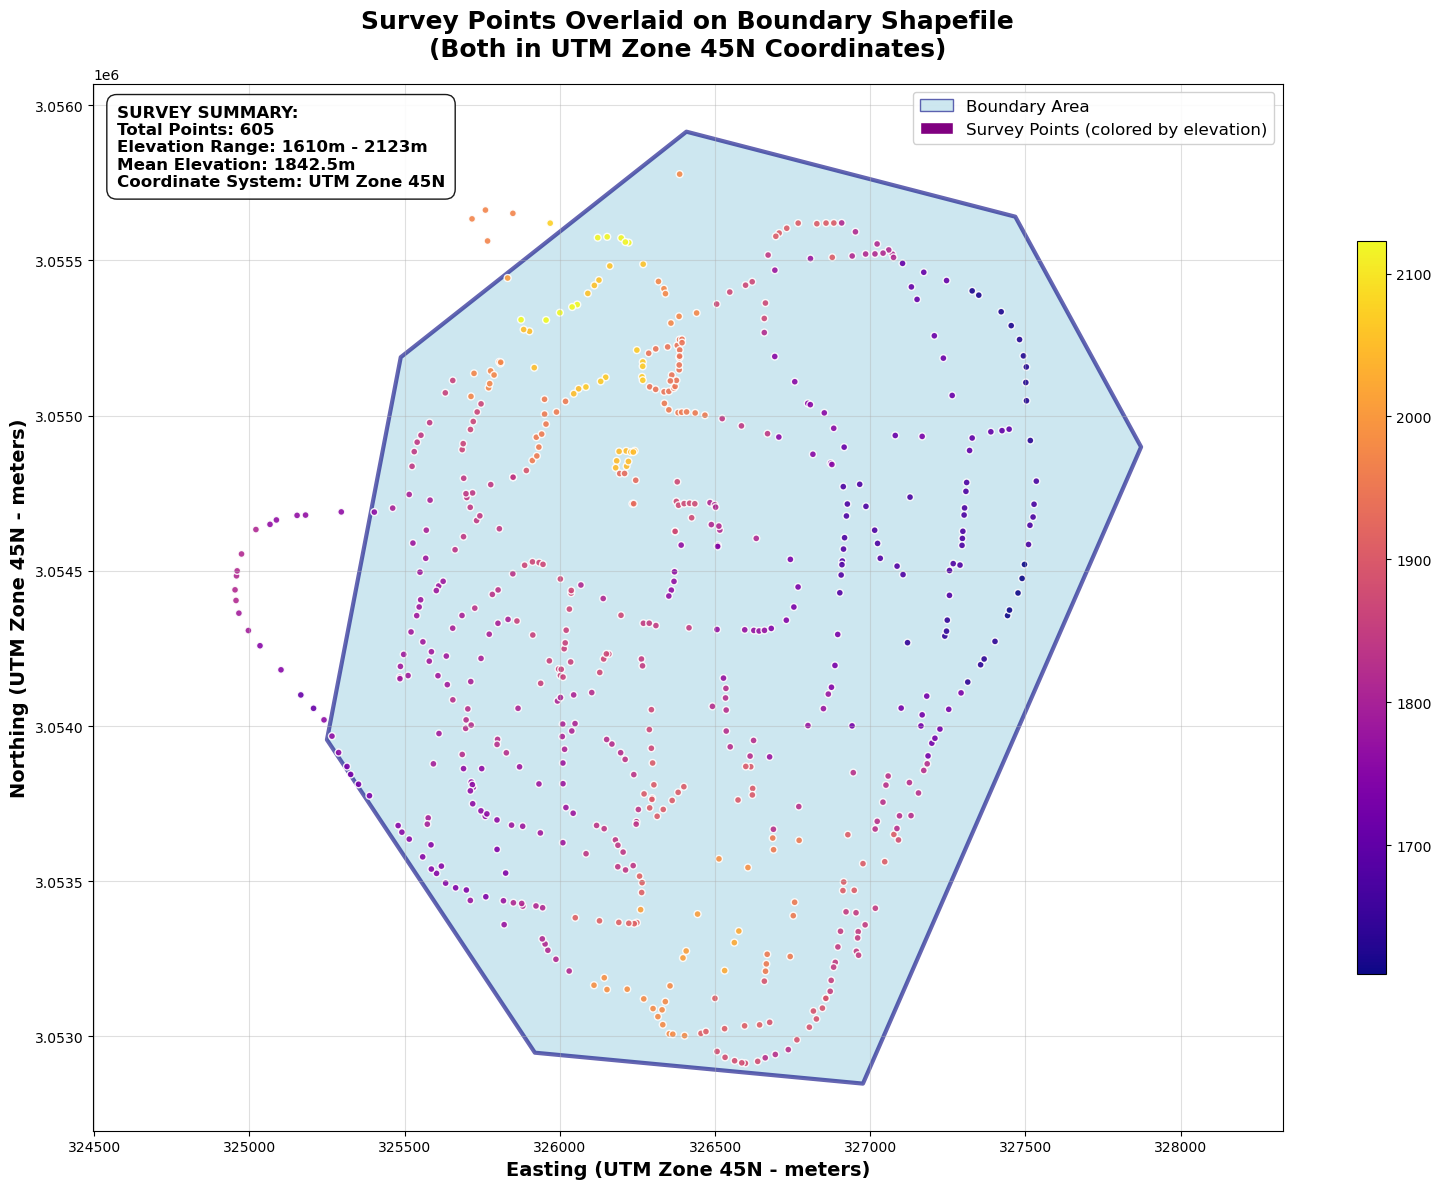

✓ Survey points successfully overlaid on shapefile with clean display!


In [116]:
# STEP 5: OVERLAY SURVEY POINTS WITH PROPER LAYERING
plt.figure(figsize=(16, 12))

# LAYER 1: Plot boundary shapefile (BOTTOM layer)
ax = boundary_gdf.plot(facecolor='lightblue',
                       edgecolor='navy',
                       linewidth=3,
                       alpha=0.6,
                       figsize=(16, 12))

# LAYER 2: Plot survey points (TOP layer) - Using elevation for coloring
survey_points_gdf.plot(ax=ax,
                       column='Elevation',  # Color by elevation
                       cmap='plasma',       # High contrast colormap
                       markersize=25,       # Small points (reduced from 200)
                       edgecolor='white',   # White border
                       linewidth=1,         # Thinner border (reduced from 2)
                       alpha=0.9,           # Nearly opaque
                       legend=True,         # Show colorbar
                       legend_kwds={'shrink': 0.7, 'aspect': 25})

# COMMENTED OUT: Add elevation labels for each point
# Uncomment the section below if you want to show point labels in the future
"""
for idx, row in survey_points_gdf.iterrows():
    ax.annotate(f"P{int(row['S.N'])}\n{int(row['Elevation'])}m", 
                xy=(row['Easting'], row['Northing']),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=11, 
                fontweight='bold',
                color='black',
                ha='left',
                bbox=dict(boxstyle='round,pad=0.4', 
                         facecolor='yellow', 
                         edgecolor='black',
                         alpha=0.9))
"""

# Enhance plot
plt.title('Survey Points Overlaid on Boundary Shapefile\n(Both in UTM Zone 45N Coordinates)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Easting (UTM Zone 45N - meters)', fontsize=14, fontweight='bold')
plt.ylabel('Northing (UTM Zone 45N - meters)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.4)

# Add legend
legend_elements = [
    mpatches.Patch(facecolor='lightblue', edgecolor='navy', alpha=0.6, label='Boundary Area'),
    mpatches.Patch(facecolor='purple', edgecolor='white', label='Survey Points (colored by elevation)')
]
plt.legend(handles=legend_elements, loc='upper right', framealpha=0.9, fontsize=12)

# Add summary statistics
min_elev = survey_points_gdf['Elevation'].min()
max_elev = survey_points_gdf['Elevation'].max()
mean_elev = survey_points_gdf['Elevation'].mean()
stats_text = f"""SURVEY SUMMARY:
Total Points: {len(survey_points_gdf)}
Elevation Range: {min_elev:.0f}m - {max_elev:.0f}m
Mean Elevation: {mean_elev:.1f}m
Coordinate System: UTM Zone 45N"""

plt.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
         verticalalignment='top', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.6', facecolor='white', 
                  edgecolor='black', alpha=0.9))

plt.axis('equal')
plt.tight_layout()
plt.show()
print("✓ Survey points successfully overlaid on shapefile with clean display!")

In [120]:
# STEP 6: PERFORM IDW INTERPOLATION
def idw_interpolation(x, y, z, xi, yi, power=2):
    """
    Inverse Distance Weighting (IDW) interpolation
    
    Parameters:
    x, y, z: Known point coordinates and values
    xi, yi: Grid coordinates for interpolation
    power: IDW power parameter (typically 2)
    """
    # Create coordinate arrays for known points and grid points
    known_points = np.column_stack((x, y))
    grid_points = np.column_stack((xi.ravel(), yi.ravel()))
    
    # Calculate distances between grid points and known points
    distances = cdist(grid_points, known_points)
    
    # Avoid division by zero for points that coincide
    distances = np.where(distances == 0, 1e-10, distances)
    
    # Calculate weights (inverse distance with power)
    weights = 1.0 / (distances ** power)
    
    # Normalize weights
    weights_sum = np.sum(weights, axis=1)
    weights_normalized = weights / weights_sum[:, np.newaxis]
    
    # Calculate interpolated values
    zi = np.sum(weights_normalized * z, axis=1)
    
    return zi.reshape(xi.shape)

# Create interpolation grid
bounds = boundary_gdf.total_bounds
x_min, y_min, x_max, y_max = bounds

# Expand bounds slightly to ensure coverage
margin = 0.02 * max(x_max - x_min, y_max - y_min)
x_min -= margin
x_max += margin
y_min -= margin
y_max += margin

# Create high-resolution grid for smooth interpolation
grid_resolution = 100
x_grid = np.linspace(x_min, x_max, grid_resolution)
y_grid = np.linspace(y_min, y_max, grid_resolution)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# Perform IDW interpolation
print("Performing IDW interpolation...")
Z_interpolated = idw_interpolation(
    survey_points['Easting'].values,
    survey_points['Northing'].values, 
    survey_points['Elevation'].values,
    X_grid, Y_grid, 
    power=2
)

print("✓ IDW interpolation completed successfully")

Performing IDW interpolation...
✓ IDW interpolation completed successfully


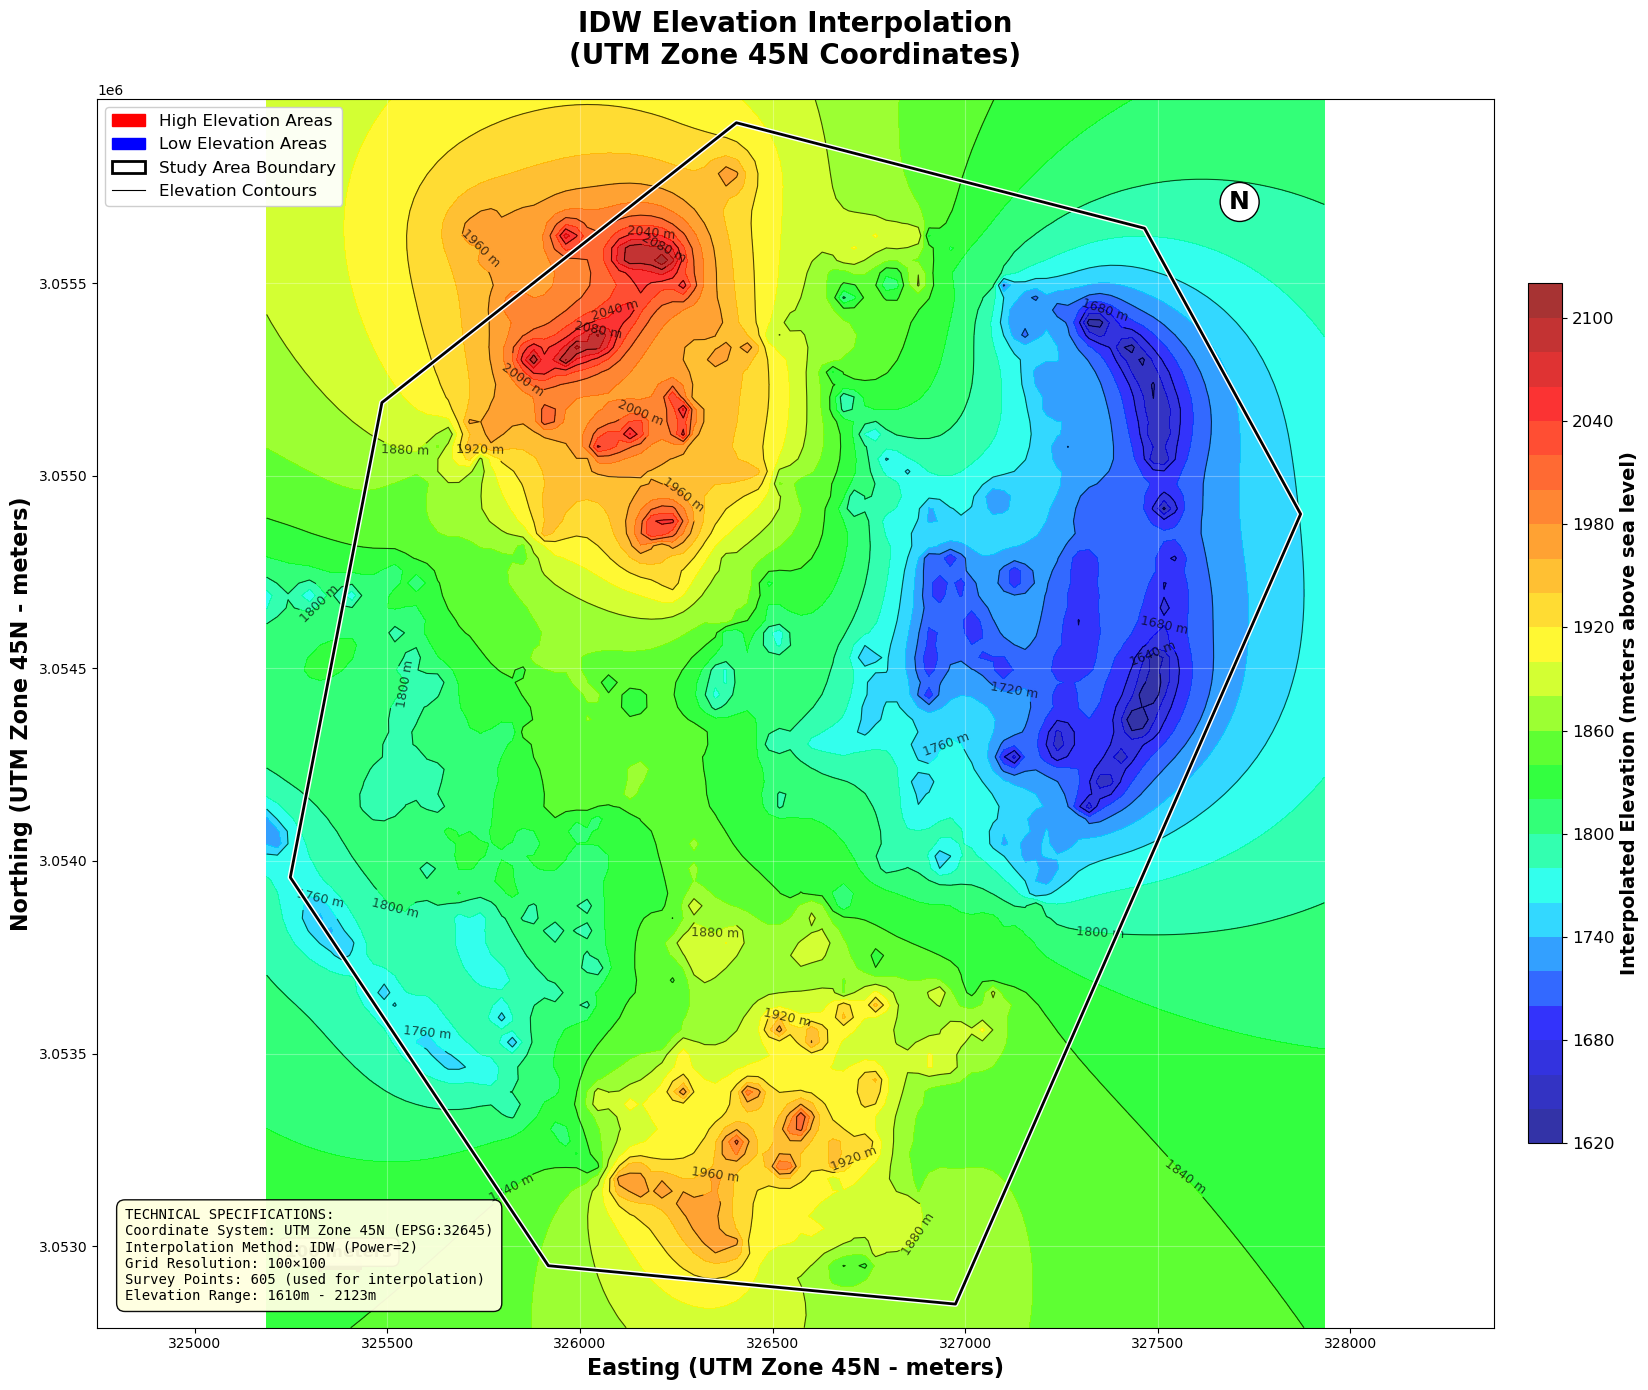


FINAL VISUALIZATION SUMMARY
✓ COORDINATE SYSTEM: UTM Zone 45N (EPSG:32645)
✓ LAYER ORDER: Interpolated surface → Contours → Boundary
✓ INTERPOLATION: IDW method using elevation values from survey points
✓ DATA POINTS: 605 points used for interpolation
✓ CARTOGRAPHIC ELEMENTS: North arrow, scale bar, legend, and grid included


In [124]:
plt.figure(figsize=(18, 14))

# Create elevation-based colormap
colors = ['#000080', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF8000', '#FF0000', '#800000']
cmap_custom = LinearSegmentedColormap.from_list('elevation', colors, N=256)

# LAYER 1: Interpolated elevation surface (BOTTOM)
contour_filled = plt.contourf(X_grid, Y_grid, Z_interpolated, 
                             levels=25, 
                             cmap=cmap_custom, 
                             alpha=0.8)

# LAYER 2: Contour lines
contour_lines = plt.contour(X_grid, Y_grid, Z_interpolated, 
                           levels=15, 
                           colors='black', 
                           linewidths=0.8, 
                           alpha=0.7)
plt.clabel(contour_lines, inline=True, fontsize=9, fmt='%1.0f m')

# LAYER 3: Boundary shapefile (TOP)
boundary_gdf.plot(ax=plt.gca(), 
                  facecolor='none', 
                  edgecolor='white', 
                  linewidth=4,
                  zorder=5)
boundary_gdf.plot(ax=plt.gca(), 
                  facecolor='none', 
                  edgecolor='black', 
                  linewidth=2,
                  zorder=6)

# Add colorbar for interpolated surface
cbar = plt.colorbar(contour_filled, shrink=0.7, aspect=25, pad=0.02)
cbar.set_label('Interpolated Elevation (meters above sea level)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Enhanced styling
plt.title('IDW Elevation Interpolation\n(UTM Zone 45N Coordinates)', 
          fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Easting (UTM Zone 45N - meters)', fontsize=16, fontweight='bold')
plt.ylabel('Northing (UTM Zone 45N - meters)', fontsize=16, fontweight='bold')

# Grid
plt.grid(True, alpha=0.3, color='white', linewidth=0.8)

# North arrow
arrow_x = x_max - 0.08 * (x_max - x_min)
arrow_y = y_max - 0.08 * (y_max - y_min)
plt.annotate('N', xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y - 30),
            arrowprops=dict(arrowstyle='->', lw=3, color='black'),
            fontsize=18, fontweight='bold', ha='center',
            bbox=dict(boxstyle='circle,pad=0.3', facecolor='white', edgecolor='black'))

# Scale bar
scale_length = 100  # 100 meters
scale_x_start = x_min + 0.05 * (x_max - x_min)
scale_y = y_min + 0.05 * (y_max - y_min)
scale_x_end = scale_x_start + scale_length

plt.plot([scale_x_start, scale_x_end], [scale_y, scale_y], 'k-', linewidth=5)
plt.plot([scale_x_start, scale_x_start], [scale_y - 10, scale_y + 10], 'k-', linewidth=3)
plt.plot([scale_x_end, scale_x_end], [scale_y - 10, scale_y + 10], 'k-', linewidth=3)
plt.text(scale_x_start + scale_length/2, scale_y + 25, f'{scale_length} meters', 
         ha='center', fontweight='bold', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='black', alpha=0.9))

# Legend (updated)
legend_elements = [
    mpatches.Patch(color='red', label='High Elevation Areas'),
    mpatches.Patch(color='blue', label='Low Elevation Areas'),
    mpatches.Patch(facecolor='none', edgecolor='black', linewidth=2, label='Study Area Boundary'),
    plt.Line2D([0], [0], color='black', linewidth=0.8, label='Elevation Contours')
]
plt.legend(handles=legend_elements, loc='upper left', framealpha=0.95, fontsize=12)

plt.axis('equal')
plt.tight_layout()

# Technical information box
tech_info = f"""TECHNICAL SPECIFICATIONS:
Coordinate System: UTM Zone 45N (EPSG:32645)
Interpolation Method: IDW (Power=2)
Grid Resolution: {grid_resolution}×{grid_resolution}
Survey Points: {len(survey_points_gdf)} (used for interpolation)
Elevation Range: {min_elev:.0f}m - {max_elev:.0f}m"""

plt.text(0.02, 0.02, tech_info, transform=plt.gca().transAxes, 
         verticalalignment='bottom', fontsize=10, fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.6', facecolor='lightyellow', 
                  edgecolor='black', alpha=0.95))

plt.show()

# Print final summary
print("\n" + "="*80)
print("FINAL VISUALIZATION SUMMARY")
print("="*80)
print("✓ COORDINATE SYSTEM: UTM Zone 45N (EPSG:32645)")
print("✓ LAYER ORDER: Interpolated surface → Contours → Boundary")
print("✓ INTERPOLATION: IDW method using elevation values from survey points")
print(f"✓ DATA POINTS: {len(survey_points_gdf)} points used for interpolation")
print("✓ CARTOGRAPHIC ELEMENTS: North arrow, scale bar, legend, and grid included")
print("="*80)

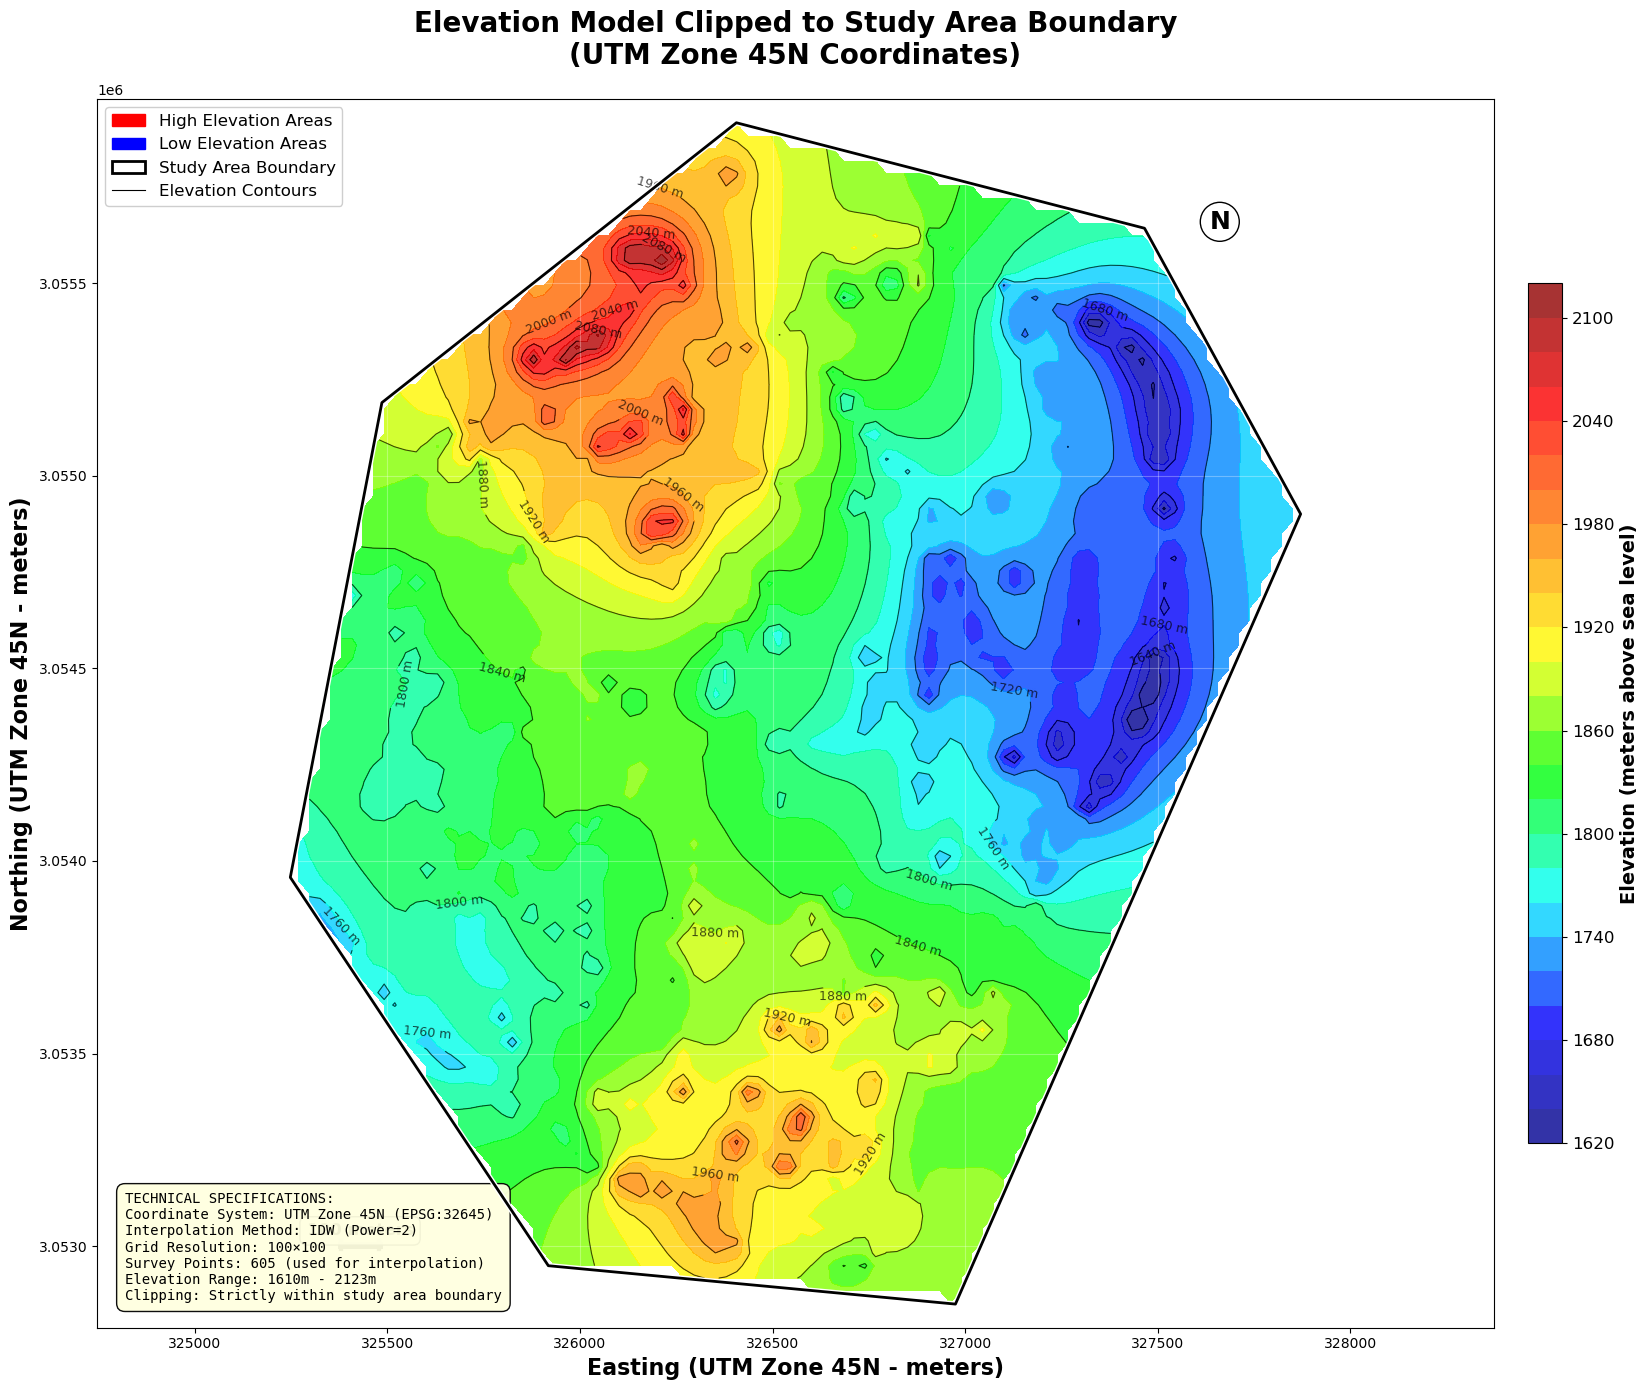

In [128]:
# Create mask for grid points inside the boundary polygon
boundary_polygon = boundary_gdf.geometry.unary_union
mask = np.zeros_like(Z_interpolated, dtype=bool)

for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
        point = Point(X_grid[i,j], Y_grid[i,j])
        mask[i,j] = boundary_polygon.contains(point)

# Apply mask to interpolated data
Z_clipped = np.ma.masked_where(~mask, Z_interpolated)

# Create the visualization
plt.figure(figsize=(18, 14))

# Create elevation-based colormap
colors = ['#000080', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF8000', '#FF0000', '#800000']
cmap_custom = LinearSegmentedColormap.from_list('elevation', colors, N=256)

# LAYER 1: Clipped elevation surface
contour_filled = plt.contourf(X_grid, Y_grid, Z_clipped, 
                             levels=25, 
                             cmap=cmap_custom, 
                             alpha=0.8)

# LAYER 2: Clipped contour lines
contour_lines = plt.contour(X_grid, Y_grid, Z_clipped, 
                           levels=15, 
                           colors='black', 
                           linewidths=0.8, 
                           alpha=0.7)
plt.clabel(contour_lines, inline=True, fontsize=9, fmt='%1.0f m')

# LAYER 3: Boundary shapefile
boundary_gdf.plot(ax=plt.gca(), 
                  facecolor='none', 
                  edgecolor='white', 
                  linewidth=4,
                  zorder=5)
boundary_gdf.plot(ax=plt.gca(), 
                  facecolor='none', 
                  edgecolor='black', 
                  linewidth=2,
                  zorder=6)

# Add colorbar for elevation
cbar = plt.colorbar(contour_filled, shrink=0.7, aspect=25, pad=0.02)
cbar.set_label('Elevation (meters above sea level)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

# Enhanced styling
plt.title('Elevation Model Clipped to Study Area Boundary\n(UTM Zone 45N Coordinates)', 
          fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Easting (UTM Zone 45N - meters)', fontsize=16, fontweight='bold')
plt.ylabel('Northing (UTM Zone 45N - meters)', fontsize=16, fontweight='bold')

# Grid
plt.grid(True, alpha=0.3, color='white', linewidth=0.8)

# North arrow
x_min, y_min = boundary_gdf.total_bounds[0], boundary_gdf.total_bounds[1]
x_max, y_max = boundary_gdf.total_bounds[2], boundary_gdf.total_bounds[3]
arrow_x = x_max - 0.08 * (x_max - x_min)
arrow_y = y_max - 0.08 * (y_max - y_min)
plt.annotate('N', xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y - 30),
            arrowprops=dict(arrowstyle='->', lw=3, color='black'),
            fontsize=18, fontweight='bold', ha='center',
            bbox=dict(boxstyle='circle,pad=0.3', facecolor='white', edgecolor='black'))

# Scale bar
scale_length = 100  # 100 meters
scale_x_start = x_min + 0.05 * (x_max - x_min)
scale_y = y_min + 0.05 * (y_max - y_min)
scale_x_end = scale_x_start + scale_length

plt.plot([scale_x_start, scale_x_end], [scale_y, scale_y], 'k-', linewidth=5)
plt.plot([scale_x_start, scale_x_start], [scale_y - 10, scale_y + 10], 'k-', linewidth=3)
plt.plot([scale_x_end, scale_x_end], [scale_y - 10, scale_y + 10], 'k-', linewidth=3)
plt.text(scale_x_start + scale_length/2, scale_y + 25, f'{scale_length} meters', 
         ha='center', fontweight='bold', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='black', alpha=0.9))

# Legend
legend_elements = [
    mpatches.Patch(color='red', label='High Elevation Areas'),
    mpatches.Patch(color='blue', label='Low Elevation Areas'),
    mpatches.Patch(facecolor='none', edgecolor='black', linewidth=2, label='Study Area Boundary'),
    plt.Line2D([0], [0], color='black', linewidth=0.8, label='Elevation Contours')
]
plt.legend(handles=legend_elements, loc='upper left', framealpha=0.95, fontsize=12)

plt.axis('equal')
plt.tight_layout()

# Technical information box
tech_info = f"""TECHNICAL SPECIFICATIONS:
Coordinate System: UTM Zone 45N (EPSG:32645)
Interpolation Method: IDW (Power=2)
Grid Resolution: {grid_resolution}×{grid_resolution}
Survey Points: {len(survey_points_gdf)} (used for interpolation)
Elevation Range: {min_elev:.0f}m - {max_elev:.0f}m
Clipping: Strictly within study area boundary"""

plt.text(0.02, 0.02, tech_info, transform=plt.gca().transAxes, 
         verticalalignment='bottom', fontsize=10, fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.6', facecolor='lightyellow', 
                  edgecolor='black', alpha=0.95))

plt.show()